# OpenCV Advanced Techniques Tutorial

This notebook explores advanced image processing techniques including template matching, image segmentation, Fourier analysis, and machine learning applications in OpenCV.

## Contents
1. [Setup and Installation](#setup)
2. [Template Matching](#template-matching)
3. [Image Segmentation](#segmentation)
4. [Fourier Transform Analysis](#fourier)
5. [Machine Learning Applications](#machine-learning)
6. [Optical Flow](#optical-flow)
7. [Advanced Feature Detection](#advanced-features)
8. [Practical Applications](#applications)
9. [Exercises](#exercises)

## 1. Setup and Installation {#setup}

First, let's import the necessary libraries and our custom modules.

In [31]:
# Install required packages if not already installed
# !pip install opencv-python numpy matplotlib scikit-learn scipy

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from scipy import ndimage
import time

# Add our source directory to Python path
sys.path.append('../src')

# Import our custom modules
from advanced.template_matching import template_matching, multi_scale_template_matching, rotation_invariant_matching, draw_template_matches
from advanced.image_segmentation import threshold_segmentation, watershed_segmentation, kmeans_segmentation, adaptive_threshold_segmentation
from advanced.fourier_analysis import fourier_transform, inverse_fourier_transform, frequency_domain_filtering, butterworth_filter, gaussian_filter_frequency
from advanced.machine_learning import object_detection_hog, motion_detection, optical_flow_lucas_kanade
from basic_operations import image_io, display
from feature_detection import corner_detection, keypoint_detection
from utils import visualization

print("✅ All modules imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'

✅ All modules imported successfully!
OpenCV version: 4.12.0
NumPy version: 2.2.6


✅ Image loaded successfully: (300, 400, 3)


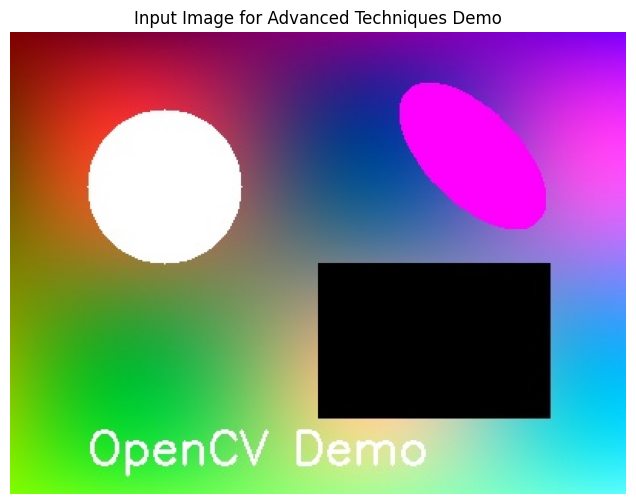

Image shape: (300, 400, 3)
Image dtype: uint8


In [32]:
# Load sample image
image_path = '../sample_images/original/demo_image.jpg'

if os.path.exists(image_path):
    image = image_io.load_image(image_path)
    print(f"✅ Image loaded successfully: {image.shape}")
else:
    # Create a synthetic image for demonstration
    print("⚠️  Sample image not found, creating synthetic image...")
    image = np.zeros((400, 600, 3), dtype=np.uint8)
    
    # Add some shapes for testing
    cv2.rectangle(image, (50, 50), (200, 150), (255, 0, 0), -1)  # Blue rectangle
    cv2.circle(image, (400, 200), 80, (0, 255, 0), -1)  # Green circle
    cv2.ellipse(image, (300, 300), (100, 50), 45, 0, 360, (0, 0, 255), -1)  # Red ellipse
    
    # Add some noise and texture
    noise = np.random.randint(0, 50, image.shape, dtype=np.uint8)
    image = cv2.add(image, noise)

# Display the loaded image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image for Advanced Techniques Demo')
plt.axis('off')
plt.show()

print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")

## 2. Template Matching {#template-matching}

Template matching is a technique for finding areas of an image that match a template. It's widely used in object detection, pattern recognition, and quality control applications.

### 2.1 Basic Template Matching

Template shape: (80, 100, 3)


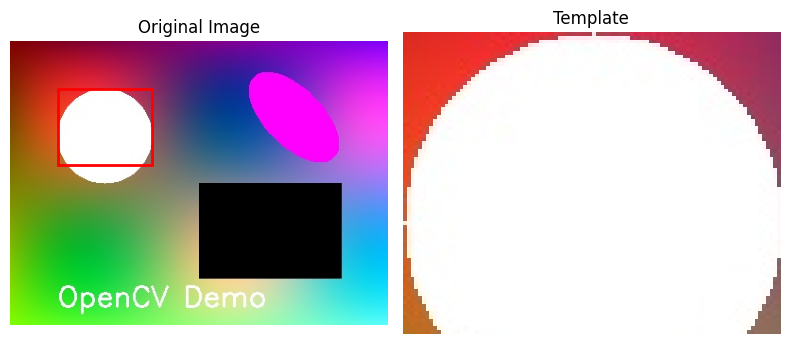

Found 165 matches
Match 1: Location (np.int64(50), np.int64(50)), Correlation: 1.000
Match 2: Location (np.int64(50), np.int64(49)), Correlation: 0.960
Match 3: Location (np.int64(50), np.int64(51)), Correlation: 0.958
Match 4: Location (np.int64(49), np.int64(50)), Correlation: 0.953
Match 5: Location (np.int64(51), np.int64(50)), Correlation: 0.946


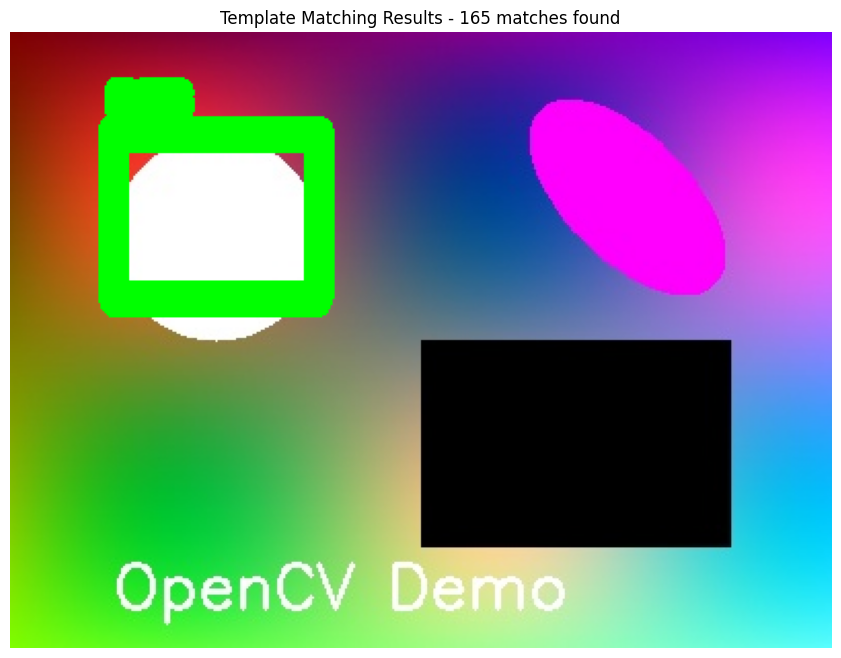

In [33]:
# Create a template from a portion of the image
template_x, template_y, template_w, template_h = 50, 50, 100, 80
template = image[template_y:template_y+template_h, template_x:template_x+template_w]

print(f"Template shape: {template.shape}")

# Display the template
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
from matplotlib.patches import Rectangle
plt.gca().add_patch(Rectangle((template_x, template_y), template_w, template_h, 
                             linewidth=2, edgecolor='red', facecolor='none'))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('Template')
plt.axis('off')
plt.tight_layout()
plt.show()

# Perform basic template matching
matches = template_matching(
    image, template, 
    method=cv2.TM_CCOEFF_NORMED, 
    threshold=0.7
)

print(f"Found {len(matches)} matches")
for i, (location, correlation) in enumerate(matches[:5]):  # Show top 5
    print(f"Match {i+1}: Location {location}, Correlation: {correlation:.3f}")

# Visualize results
result_image = draw_template_matches(
    image, template, matches, color=(0, 255, 0), thickness=2
)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title(f'Template Matching Results - {len(matches)} matches found')
plt.axis('off')
plt.show()

### 2.2 Multi-Scale Template Matching

Objects in images can appear at different scales. Multi-scale template matching searches for the template at various sizes.

Multi-scale matching found 1033 matches


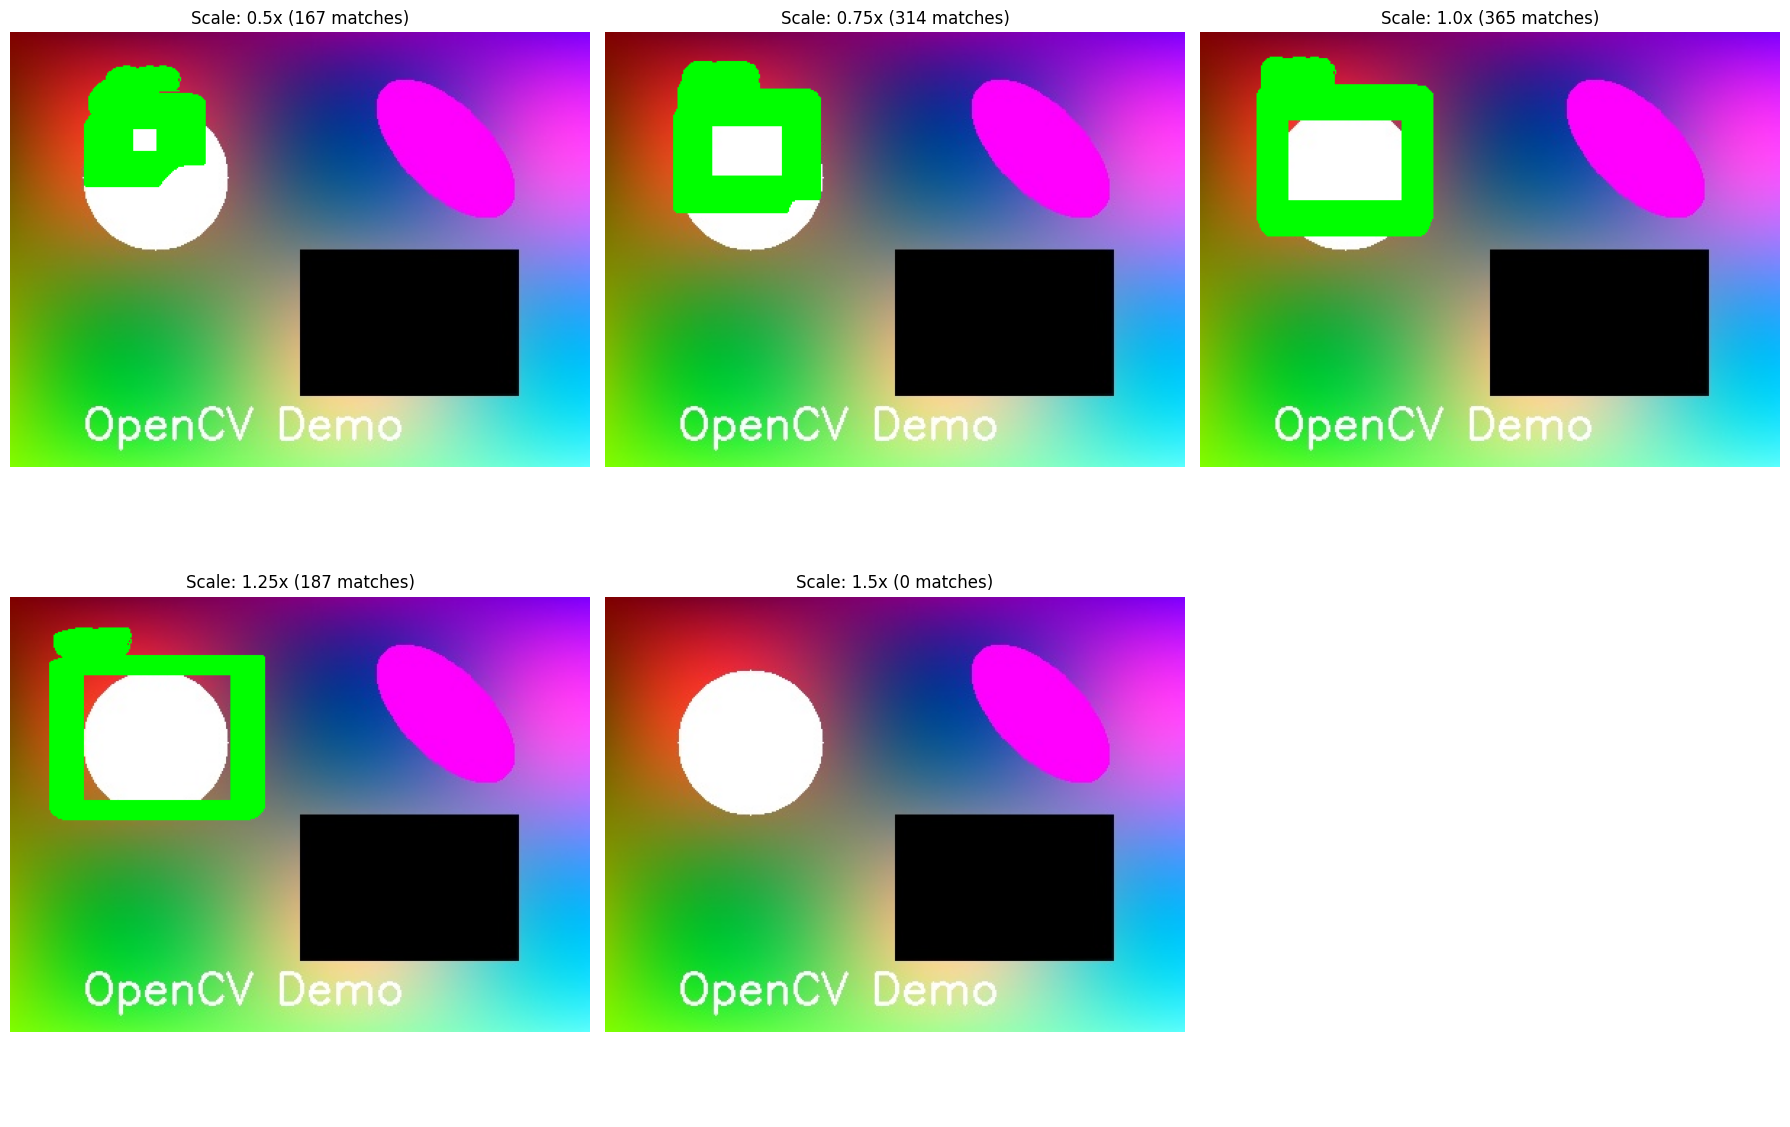


Detailed Multi-scale Results:
Scale 0.5x: 167 matches
  Match 1: (np.int64(73), np.int64(48)), Correlation: 0.683
  Match 2: (np.int64(74), np.int64(48)), Correlation: 0.683
  Match 3: (np.int64(75), np.int64(48)), Correlation: 0.683
Scale 0.75x: 314 matches
  Match 1: (np.int64(62), np.int64(49)), Correlation: 0.793
  Match 2: (np.int64(63), np.int64(49)), Correlation: 0.791
  Match 3: (np.int64(61), np.int64(49)), Correlation: 0.791
Scale 1.0x: 365 matches
  Match 1: (np.int64(50), np.int64(50)), Correlation: 1.000
  Match 2: (np.int64(50), np.int64(49)), Correlation: 0.960
  Match 3: (np.int64(50), np.int64(51)), Correlation: 0.958
Scale 1.25x: 187 matches
  Match 1: (np.int64(41), np.int64(49)), Correlation: 0.639
  Match 2: (np.int64(40), np.int64(49)), Correlation: 0.639
  Match 3: (np.int64(42), np.int64(49)), Correlation: 0.638


In [34]:
# Multi-scale template matching
scales = [0.5, 0.75, 1.0, 1.25, 1.5]
multiscale_matches = multi_scale_template_matching(
    image, template, 
    scales=scales,
    method=cv2.TM_CCOEFF_NORMED, 
    threshold=0.6
)

print(f"Multi-scale matching found {len(multiscale_matches)} matches")

# Group matches by scale
scale_groups = {}
for location, correlation, scale in multiscale_matches:
    if scale not in scale_groups:
        scale_groups[scale] = []
    scale_groups[scale].append((location, correlation))

# Display results for each scale
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, scale in enumerate(scales):
    if i < len(axes):
        result_img = image.copy()
        if scale in scale_groups:
            matches_at_scale = scale_groups[scale]
            for location, correlation in matches_at_scale:
                # Calculate template size at this scale
                scaled_w = int(template_w * scale)
                scaled_h = int(template_h * scale)
                cv2.rectangle(result_img, location, 
                            (location[0] + scaled_w, location[1] + scaled_h), 
                            (0, 255, 0), 2)
                cv2.putText(result_img, f'{correlation:.2f}', 
                          (location[0], location[1] - 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        
        axes[i].imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f'Scale: {scale}x ({len(scale_groups.get(scale, []))} matches)')
        axes[i].axis('off')

# Hide empty subplot
if len(scales) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Multi-scale Results:")
for scale in sorted(scale_groups.keys()):
    matches_at_scale = scale_groups[scale]
    print(f"Scale {scale}x: {len(matches_at_scale)} matches")
    for j, (location, correlation) in enumerate(matches_at_scale[:3]):  # Top 3
        print(f"  Match {j+1}: {location}, Correlation: {correlation:.3f}")

### 2.3 Rotation-Invariant Template Matching

For templates that might appear at different orientations, we can use rotation-invariant matching.

Rotation-invariant matching found 3132 matches


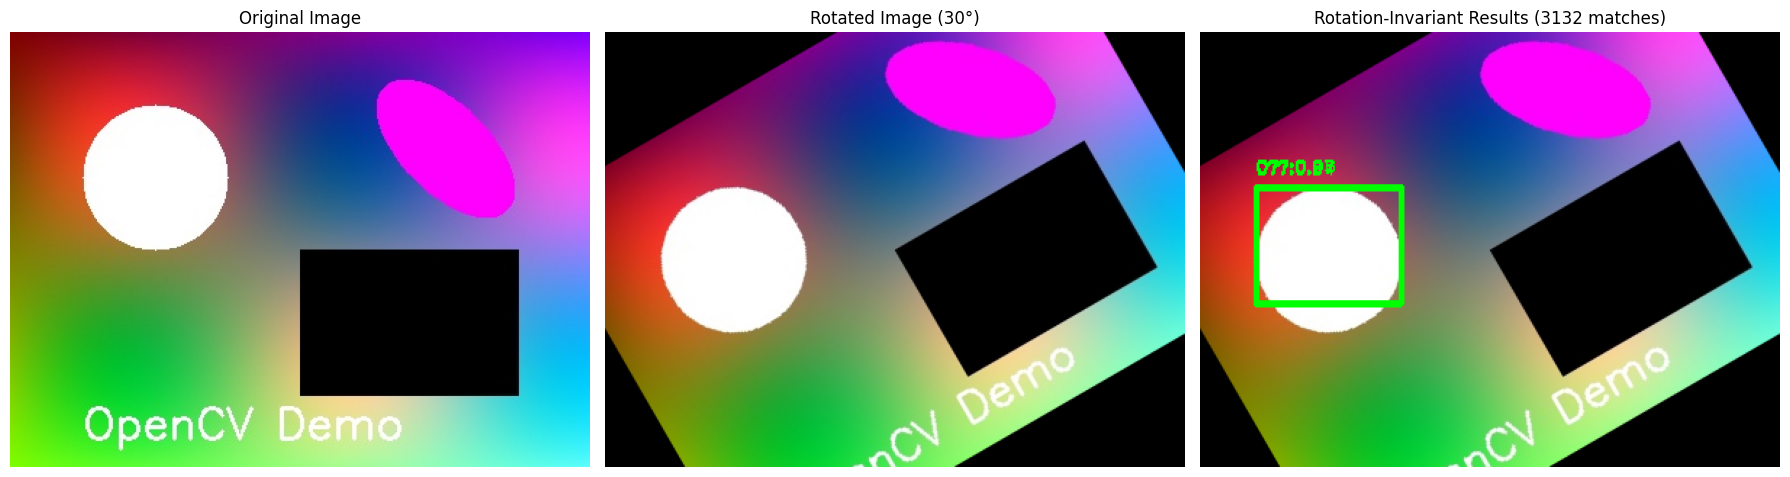


Best matches by rotation angle:
Angle 0°: Best correlation 0.975 at (np.int64(38), np.int64(107))
Angle 15°: Best correlation 0.803 at (np.int64(36), np.int64(107))
Angle 30°: Best correlation 0.739 at (np.int64(34), np.int64(109))
Angle 45°: Best correlation 0.704 at (np.int64(32), np.int64(110))
Angle 60°: Best correlation 0.674 at (np.int64(30), np.int64(112))
Angle 75°: Best correlation 0.642 at (np.int64(29), np.int64(115))
Angle 90°: Best correlation 0.640 at (np.int64(29), np.int64(117))
Angle 105°: Best correlation 0.633 at (np.int64(29), np.int64(119))
Angle 120°: Best correlation 0.658 at (np.int64(30), np.int64(121))
Angle 135°: Best correlation 0.686 at (np.int64(32), np.int64(123))
Angle 150°: Best correlation 0.713 at (np.int64(34), np.int64(125))
Angle 165°: Best correlation 0.758 at (np.int64(36), np.int64(126))
Angle 180°: Best correlation 0.811 at (np.int64(38), np.int64(127))
Angle 195°: Best correlation 0.769 at (np.int64(41), np.int64(126))
Angle 210°: Best correl

In [35]:
# Create a rotated version of the image for testing
center = (image.shape[1]//2, image.shape[0]//2)
rotation_matrix = cv2.getRotationMatrix2D(center, 30, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Rotation-invariant template matching
angles = range(0, 360, 15)  # Check every 15 degrees
rotation_matches = rotation_invariant_matching(
    rotated_image, template,
    angles=angles,
    method=cv2.TM_CCOEFF_NORMED,
    threshold=0.6
)

print(f"Rotation-invariant matching found {len(rotation_matches)} matches")

# Group matches by angle
angle_groups = {}
for location, correlation, angle in rotation_matches:
    if angle not in angle_groups:
        angle_groups[angle] = []
    angle_groups[angle].append((location, correlation))

# Display original, rotated, and results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Rotated image
axes[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Rotated Image (30°)')
axes[1].axis('off')

# Results on rotated image
result_img = rotated_image.copy()
for location, correlation, angle in rotation_matches[:5]:  # Show top 5
    cv2.rectangle(result_img, location, 
                 (location[0] + template_w, location[1] + template_h), 
                 (0, 255, 0), 2)
    cv2.putText(result_img, f'{angle}°:{correlation:.2f}', 
               (location[0], location[1] - 10),
               cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

axes[2].imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Rotation-Invariant Results ({len(rotation_matches)} matches)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Print best matches for each angle
print("\nBest matches by rotation angle:")
for angle in sorted(angle_groups.keys()):
    matches_at_angle = angle_groups[angle]
    if matches_at_angle:
        best_match = max(matches_at_angle, key=lambda x: x[1])
        print(f"Angle {angle}°: Best correlation {best_match[1]:.3f} at {best_match[0]}")

## 3. Image Segmentation {#segmentation}

Image segmentation is the process of partitioning an image into multiple segments to simplify analysis. We'll explore various segmentation techniques.

### 3.1 Threshold-based Segmentation

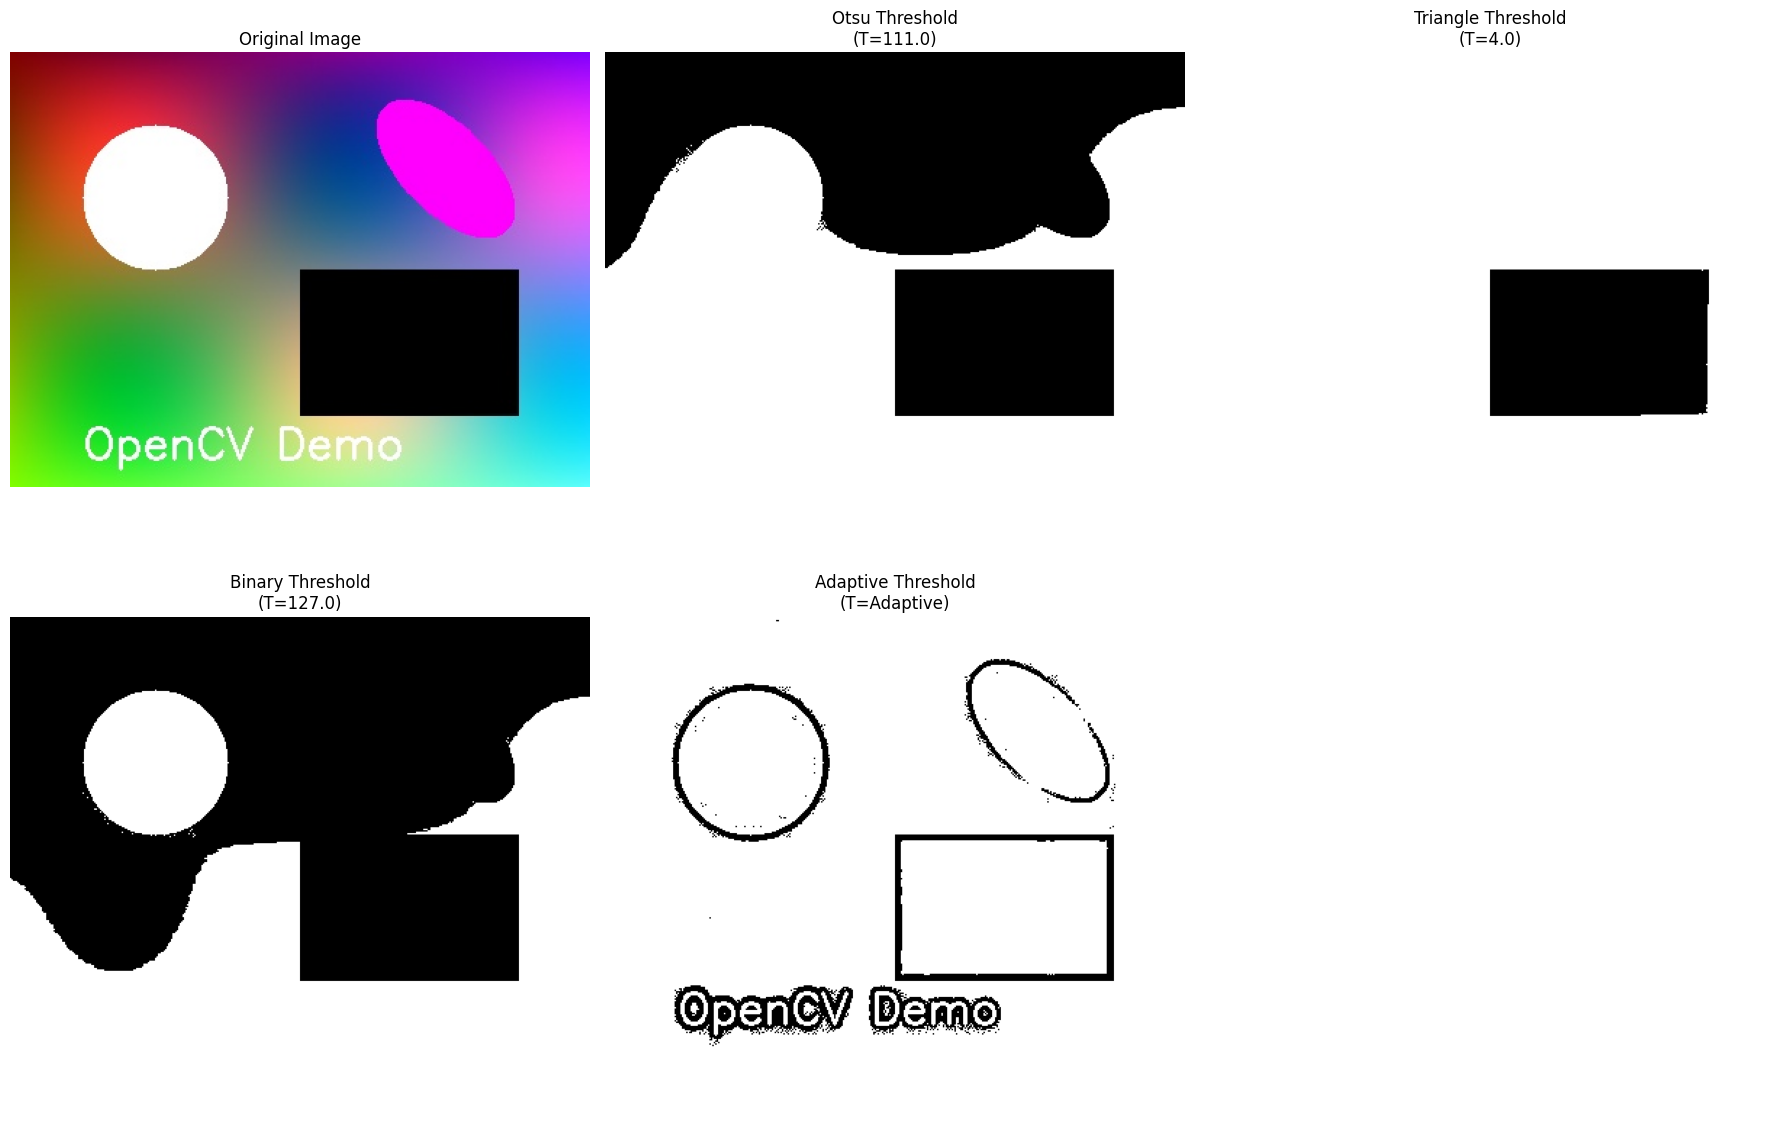

Threshold Segmentation Results:
Otsu        : Threshold =  111.0, Segments = 2
Triangle    : Threshold =    4.0, Segments = 2
Binary      : Threshold =  127.0, Segments = 2
Adaptive    : Threshold = Variable, Segments = 2


In [36]:
# Demonstrate different threshold segmentation methods
threshold_methods = ['otsu', 'triangle', 'binary', 'adaptive']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Convert to grayscale for threshold operations
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply different threshold methods
for i, method in enumerate(threshold_methods, 1):
    if method == 'adaptive':
        # Adaptive threshold
        segmented = adaptive_threshold_segmentation(
            image, block_size=11, c=2, method='gaussian'
        )
        threshold_value = "Adaptive"
    else:
        # Regular threshold methods
        segmented, threshold_value = threshold_segmentation(
            image, method=method
        )
    
    axes[i].imshow(segmented, cmap='gray')
    axes[i].set_title(f'{method.title()} Threshold\n(T={threshold_value})')
    axes[i].axis('off')

# Hide empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Compare segmentation quality
print("Threshold Segmentation Results:")
print("=" * 40)

for method in threshold_methods:
    if method == 'adaptive':
        segmented = adaptive_threshold_segmentation(image)
        unique_values = len(np.unique(segmented))
    else:
        segmented, threshold_value = threshold_segmentation(image, method=method)
        unique_values = len(np.unique(segmented))
        print(f"{method.title():12}: Threshold = {threshold_value:6.1f}, Segments = {unique_values}")

print(f"{'Adaptive':12}: Threshold = {'Variable':>6}, Segments = {unique_values}")

### 3.2 Watershed Segmentation

Watershed segmentation treats the image like a topographic surface and finds watersheds to separate different regions.

Performing watershed segmentation...


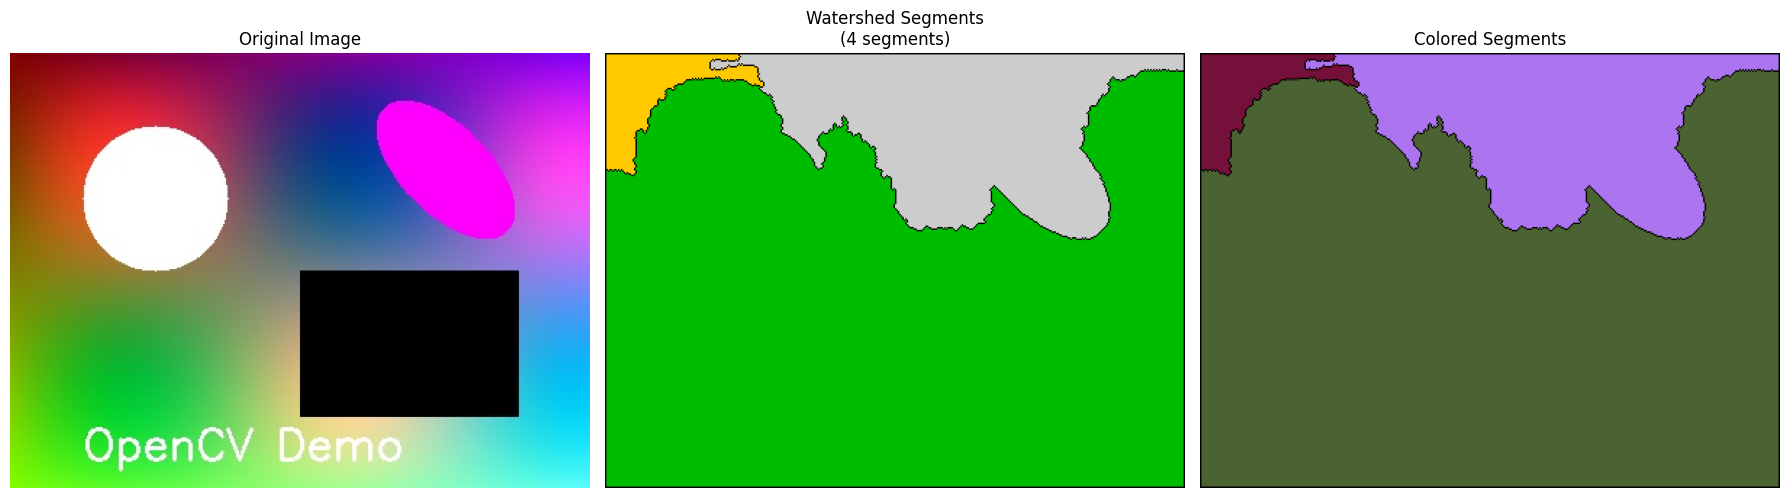

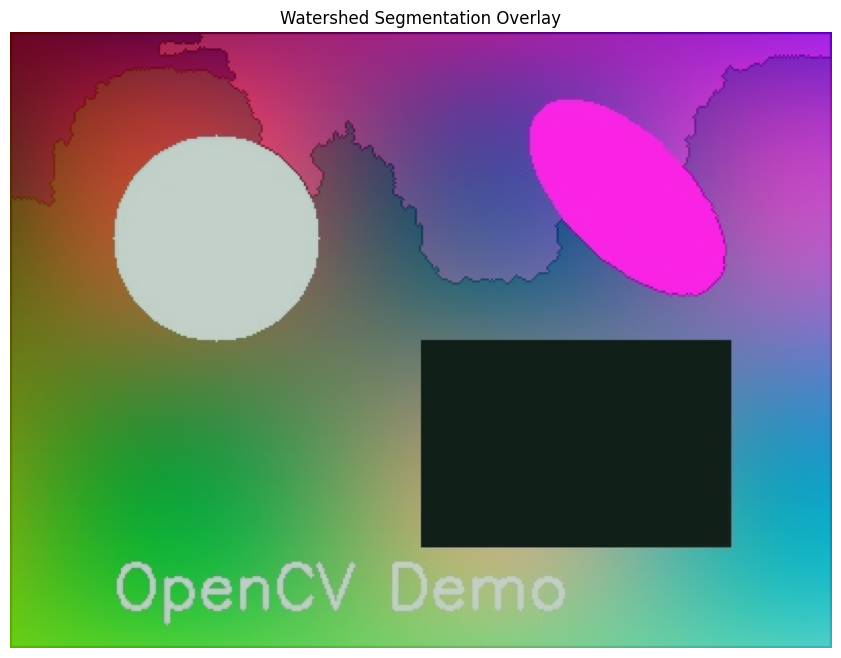

Watershed segmentation found 4 segments
Segment IDs: [np.int32(-1), np.int32(1), np.int32(2), np.int32(3)]


In [37]:
# Watershed segmentation
print("Performing watershed segmentation...")
watershed_result, markers = watershed_segmentation(image)

# Create a colored visualization of the segments
def colorize_segments(segments):
    """Convert segments to a colored visualization"""
    colored = np.zeros((segments.shape[0], segments.shape[1], 3), dtype=np.uint8)
    unique_segments = np.unique(segments)
    
    for i, segment_id in enumerate(unique_segments):
        if segment_id > 0:  # Skip background
            mask = segments == segment_id
            # Generate a random color for each segment
            color = np.random.randint(0, 255, 3)
            colored[mask] = color
    
    return colored

colored_watershed = colorize_segments(watershed_result)

# Display watershed results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(watershed_result, cmap='nipy_spectral')
axes[1].set_title(f'Watershed Segments\n({len(np.unique(watershed_result))} segments)')
axes[1].axis('off')

axes[2].imshow(colored_watershed)
axes[2].set_title('Colored Segments')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Overlay segments on original image
overlay = cv2.addWeighted(image, 0.7, colored_watershed, 0.3, 0)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation Overlay')
plt.axis('off')
plt.show()

print(f"Watershed segmentation found {len(np.unique(watershed_result))} segments")
print(f"Segment IDs: {sorted(np.unique(watershed_result))}")

### 3.3 K-Means Clustering Segmentation

K-means clustering groups pixels with similar colors into clusters, creating segments based on color similarity.

Performing K-means with 2 clusters...
  Cluster centers: [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
Performing K-means with 3 clusters...
  Cluster centers: [[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
Performing K-means with 4 clusters...
  Cluster centers: [[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]  Cluster centers: [[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
Performing K-means with 5 clusters...
  Cluster centers: [[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]

Performing K-means with 5 clusters...
  Cluster centers: [[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0

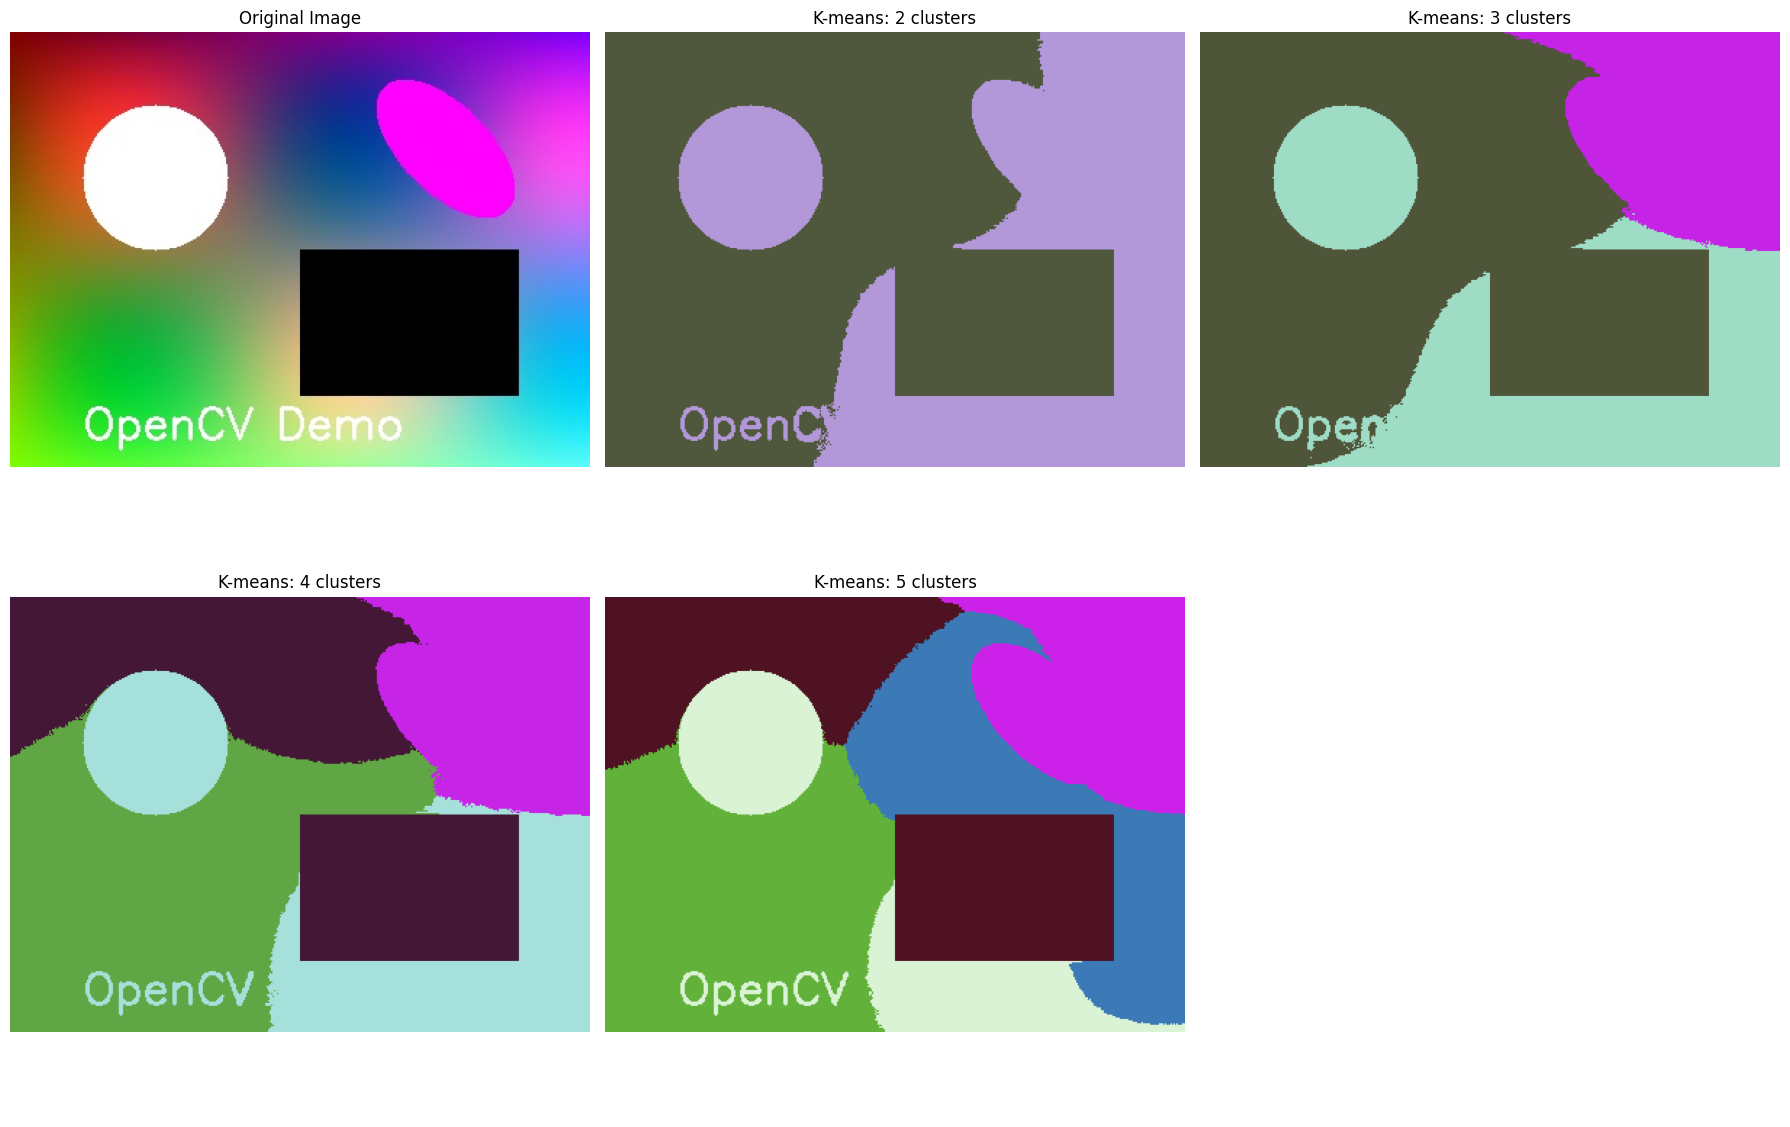


Analyzing optimal cluster number using WCSS (Within-Cluster Sum of Squares)...


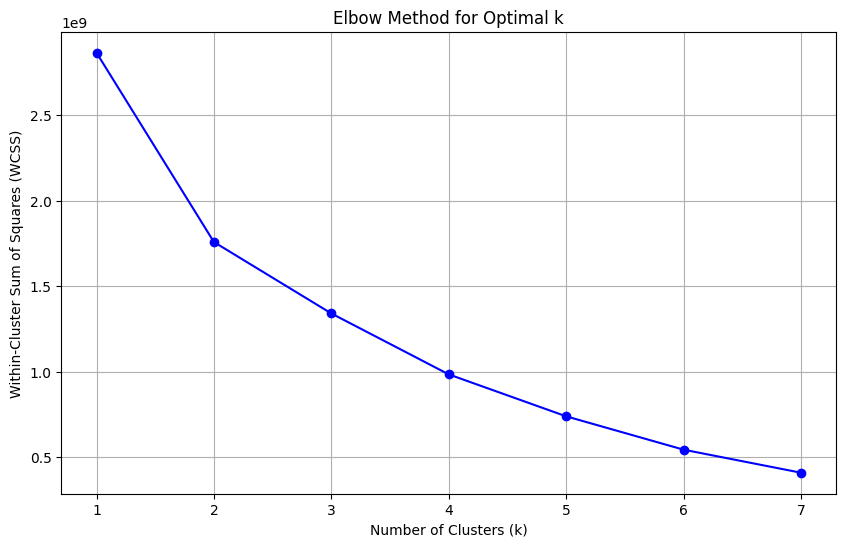

Suggested optimal number of clusters: 2


In [38]:
# K-means clustering segmentation with different cluster numbers
cluster_numbers = [2, 3, 4, 5]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Apply K-means with different cluster numbers
for i, n_clusters in enumerate(cluster_numbers, 1):
    print(f"Performing K-means with {n_clusters} clusters...")
    
    segmented, centers = kmeans_segmentation(
        image, n_clusters=n_clusters, max_iterations=100
    )
    
    axes[i].imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'K-means: {n_clusters} clusters')
    axes[i].axis('off')
    
    # Print cluster centers
    print(f"  Cluster centers: {centers}")

# Hide empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Detailed analysis of optimal cluster number
print("\nAnalyzing optimal cluster number using WCSS (Within-Cluster Sum of Squares)...")

# Reshape image for clustering analysis
h, w, c = image.shape
data = image.reshape((-1, c)).astype(np.float32)

wcss = []
K_range = range(1, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Find elbow point (simplified method)
if len(wcss) >= 3:
    # Calculate second derivative to find elbow
    second_derivative = []
    for i in range(1, len(wcss)-1):
        second_derivative.append(wcss[i-1] - 2*wcss[i] + wcss[i+1])
    
    optimal_k = second_derivative.index(max(second_derivative)) + 2
    print(f"Suggested optimal number of clusters: {optimal_k}")
else:
    print("Need more data points to determine optimal k")

## 4. Fourier Transform Analysis {#fourier}

Fourier Transform converts images from spatial domain to frequency domain, enabling frequency-based filtering and analysis.

### 4.1 Basic Fourier Transform

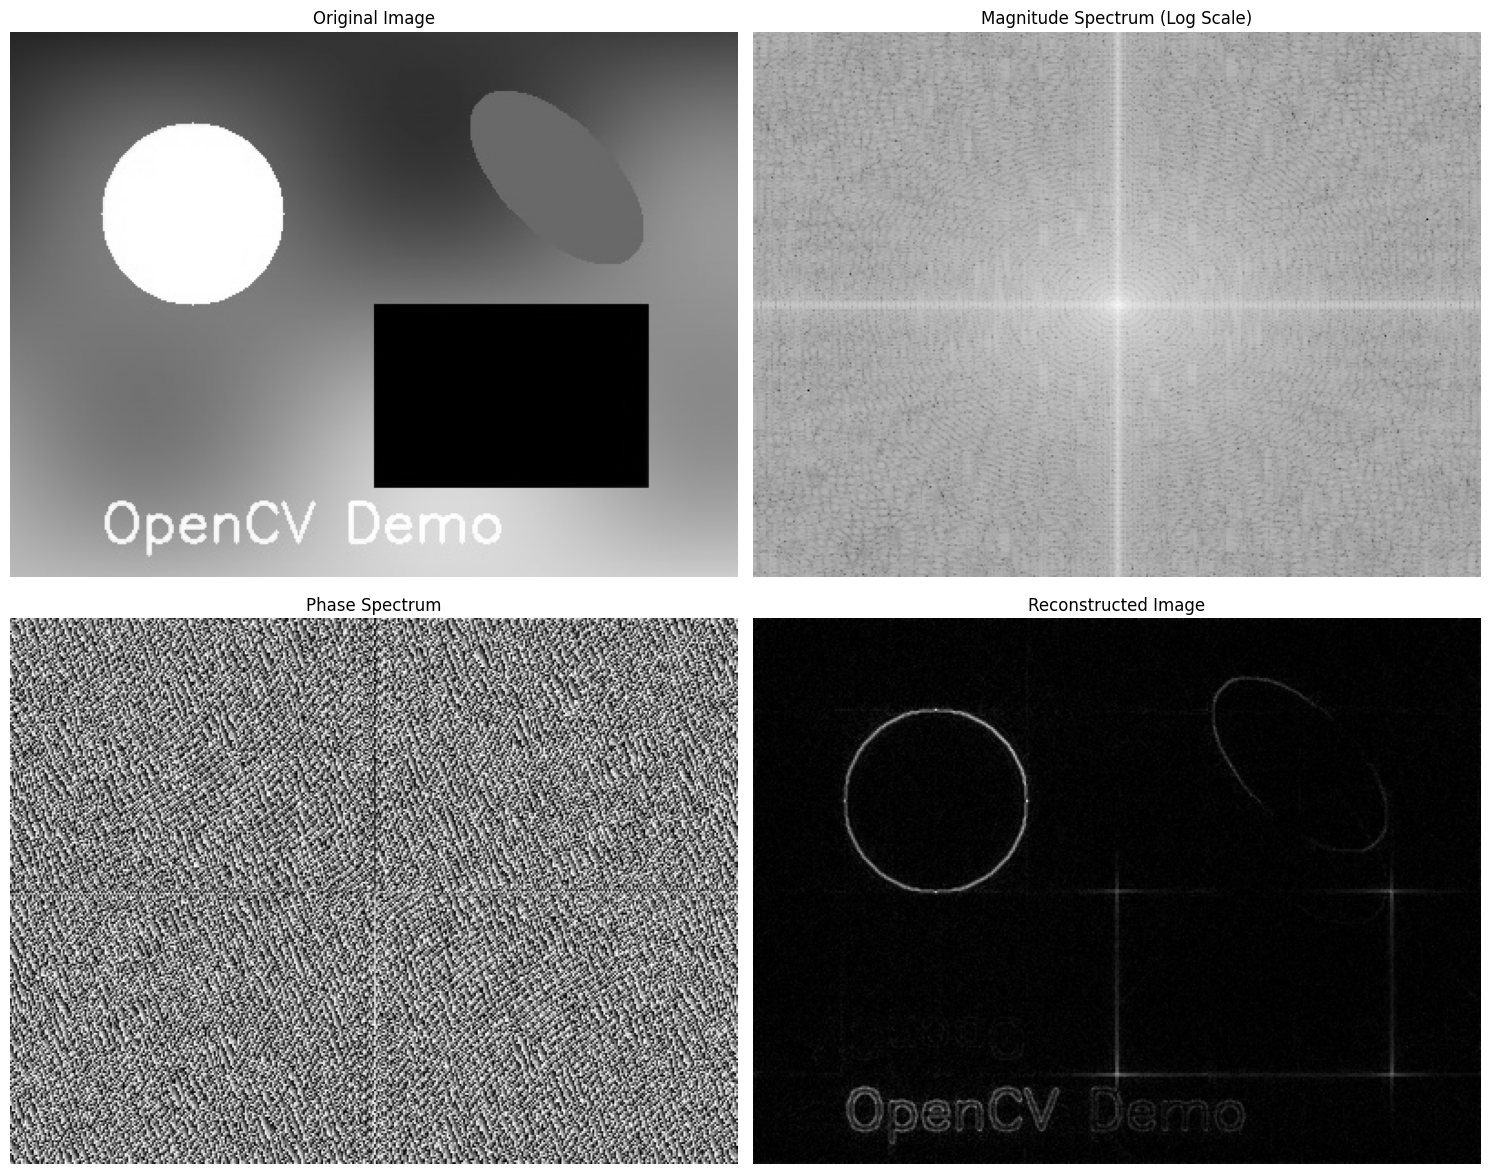

Fourier Transform Analysis:
Original image shape: (300, 400)
Magnitude spectrum shape: (300, 400)
Phase spectrum shape: (300, 400)
Magnitude range: [0.76, 16.45]
Phase range: [-3.14, 3.14]
Reconstruction MSE: 18195.273281
Low frequency energy: 4.59e+03
High frequency energy: 8.69e+05
Energy ratio (low/high): 0.01


In [39]:
# Convert image to grayscale for Fourier analysis
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Fourier Transform
magnitude, phase = fourier_transform(gray_image)

# Display Fourier transform results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Original image
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Magnitude spectrum (log scale for better visualization)
axes[0, 1].imshow(np.log(magnitude + 1), cmap='gray')
axes[0, 1].set_title('Magnitude Spectrum (Log Scale)')
axes[0, 1].axis('off')

# Phase spectrum
axes[1, 0].imshow(phase, cmap='gray')
axes[1, 0].set_title('Phase Spectrum')
axes[1, 0].axis('off')

# Reconstructed image from magnitude and phase
reconstructed = inverse_fourier_transform(magnitude, phase)
axes[1, 1].imshow(reconstructed, cmap='gray')
axes[1, 1].set_title('Reconstructed Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Analyze frequency content
print("Fourier Transform Analysis:")
print("=" * 30)
print(f"Original image shape: {gray_image.shape}")
print(f"Magnitude spectrum shape: {magnitude.shape}")
print(f"Phase spectrum shape: {phase.shape}")
print(f"Magnitude range: [{magnitude.min():.2f}, {magnitude.max():.2f}]")
print(f"Phase range: [{phase.min():.2f}, {phase.max():.2f}]")

# Check reconstruction quality
mse = np.mean((gray_image.astype(float) - reconstructed.astype(float))**2)
print(f"Reconstruction MSE: {mse:.6f}")

# Frequency domain statistics
center_y, center_x = magnitude.shape[0]//2, magnitude.shape[1]//2
low_freq = magnitude[center_y-10:center_y+10, center_x-10:center_x+10]
high_freq_mask = np.ones_like(magnitude, dtype=bool)
high_freq_mask[center_y-10:center_y+10, center_x-10:center_x+10] = False
high_freq = magnitude[high_freq_mask]

print(f"Low frequency energy: {np.sum(low_freq):.2e}")
print(f"High frequency energy: {np.sum(high_freq):.2e}")
print(f"Energy ratio (low/high): {np.sum(low_freq)/np.sum(high_freq):.2f}")

### 4.2 Frequency Domain Filtering

We can filter images in the frequency domain by modifying the Fourier transform.

Applying lowpass filter with cutoff 30...
Applying lowpass filter with cutoff 50...
Applying lowpass filter with cutoff 100...
Applying highpass filter with cutoff 30...
Applying highpass filter with cutoff 50...
Applying highpass filter with cutoff 100...


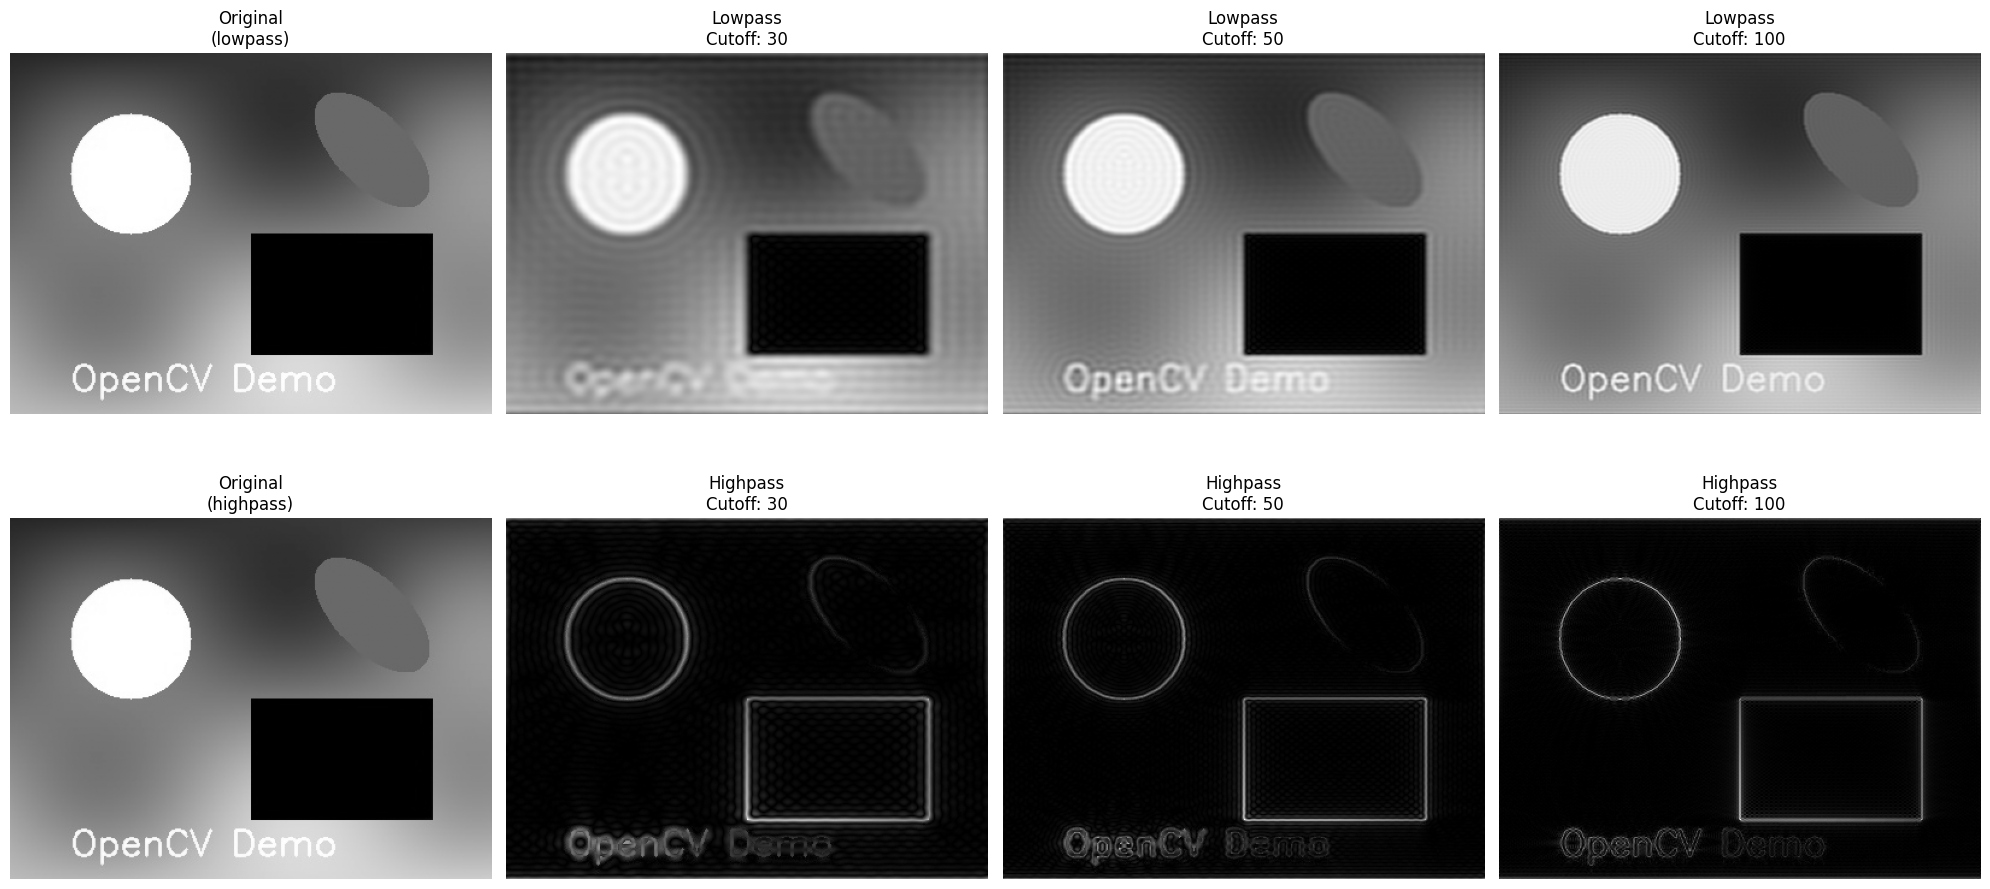


Comparing filter types with cutoff frequency 50:


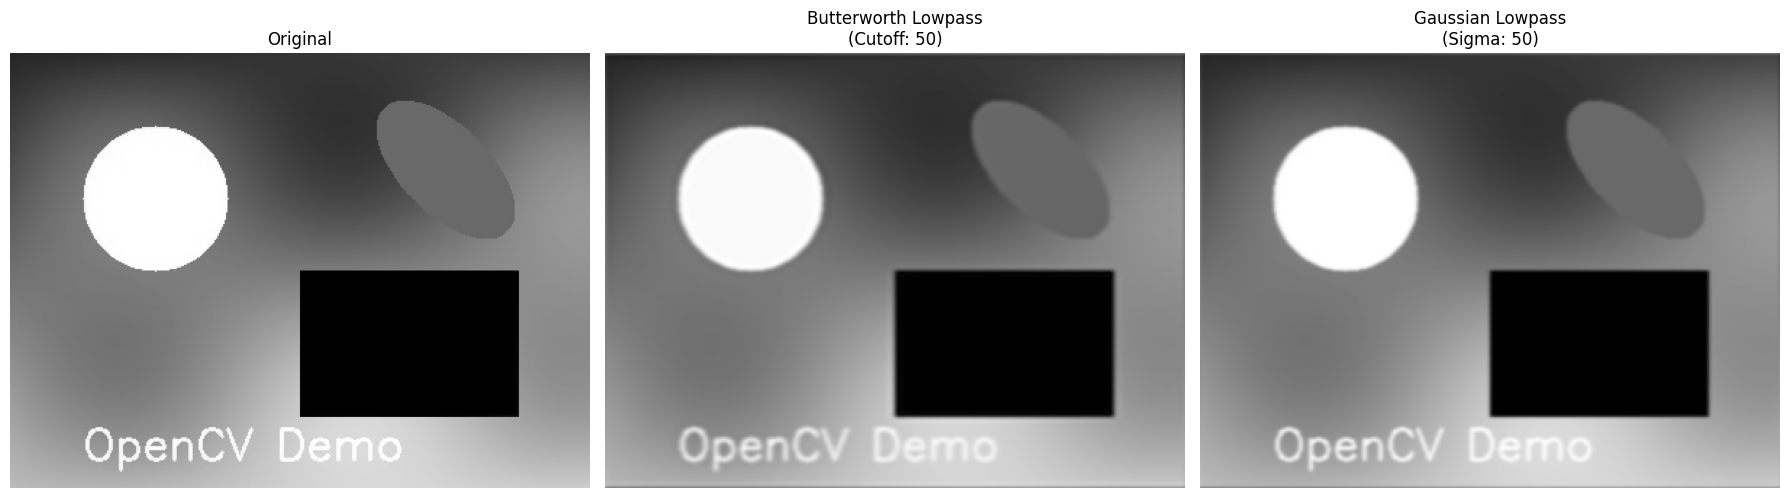


Filtering Analysis:
Original image std: 69.17
Butterworth filtered std: 68.04
Gaussian filtered std: 67.99

Smoothing effect:
Butterworth: 1.6% reduction in std
Gaussian: 1.7% reduction in std


In [40]:
# Apply different frequency domain filters
filter_types = ['lowpass', 'highpass']
cutoff_frequencies = [30, 50, 100]

fig, axes = plt.subplots(len(filter_types), len(cutoff_frequencies) + 1, figsize=(20, 10))

for i, filter_type in enumerate(filter_types):
    # Original image
    axes[i, 0].imshow(gray_image, cmap='gray')
    axes[i, 0].set_title(f'Original\n({filter_type})')
    axes[i, 0].axis('off')
    
    for j, cutoff in enumerate(cutoff_frequencies):
        print(f"Applying {filter_type} filter with cutoff {cutoff}...")
        
        # Apply frequency domain filter
        filtered = frequency_domain_filtering(
            gray_image, 
            filter_type=filter_type, 
            cutoff_frequency=cutoff, 
            order=2
        )
        
        axes[i, j+1].imshow(filtered, cmap='gray')
        axes[i, j+1].set_title(f'{filter_type.title()}\nCutoff: {cutoff}')
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

# Compare Butterworth and Gaussian filters
cutoff_freq = 50

print(f"\nComparing filter types with cutoff frequency {cutoff_freq}:")

# Butterworth filter
butterworth_filtered = butterworth_filter(
    gray_image, filter_type='lowpass', cutoff_frequency=cutoff_freq, order=2
)

# Gaussian filter
gaussian_filtered = gaussian_filter_frequency(
    gray_image, filter_type='lowpass', sigma=cutoff_freq
)

# Display comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(butterworth_filtered, cmap='gray')
axes[1].set_title(f'Butterworth Lowpass\n(Cutoff: {cutoff_freq})')
axes[1].axis('off')

axes[2].imshow(gaussian_filtered, cmap='gray')
axes[2].set_title(f'Gaussian Lowpass\n(Sigma: {cutoff_freq})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Analyze filtering effects
print("\nFiltering Analysis:")
print("=" * 25)

original_std = np.std(gray_image)
butterworth_std = np.std(butterworth_filtered)
gaussian_std = np.std(gaussian_filtered)

print(f"Original image std: {original_std:.2f}")
print(f"Butterworth filtered std: {butterworth_std:.2f}")
print(f"Gaussian filtered std: {gaussian_std:.2f}")

print(f"\nSmoothing effect:")
print(f"Butterworth: {(1 - butterworth_std/original_std)*100:.1f}% reduction in std")
print(f"Gaussian: {(1 - gaussian_std/original_std)*100:.1f}% reduction in std")

## 5. Machine Learning Applications {#machine-learning}

OpenCV provides built-in machine learning capabilities for object detection and recognition.

### 5.1 HOG (Histogram of Oriented Gradients) Detection

Performing HOG-based object detection...
HOG detection failed: 'tuple' object has no attribute 'tolist'
This is normal if the image doesn't contain people or compatible objects

Creating synthetic test image for HOG analysis...
HOG detection failed: 'tuple' object has no attribute 'tolist'
This is normal if the image doesn't contain people or compatible objects

Creating synthetic test image for HOG analysis...


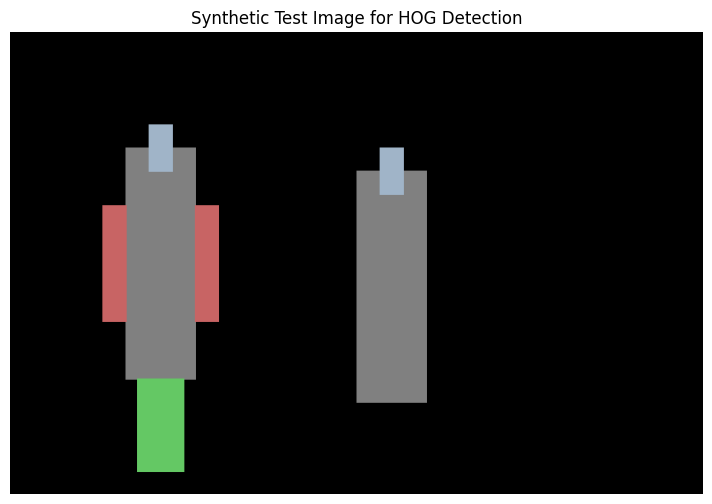

HOG detection on synthetic image failed: 'tuple' object has no attribute 'tolist'


In [41]:
# HOG object detection (primarily for people detection)
print("Performing HOG-based object detection...")

try:
    hog_result, detections = object_detection_hog(
        image, 
        win_stride=(8, 8), 
        padding=(4, 4), 
        scale=1.05
    )
    
    print(f"HOG detection found {len(detections)} objects")
    
    # Display results
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(hog_result, cv2.COLOR_BGR2RGB))
    plt.title(f'HOG Object Detection - {len(detections)} detections')
    plt.axis('off')
    plt.show()
    
    # Print detection details
    if detections:
        print("Detection details:")
        for i, (x, y, w, h) in enumerate(detections):
            print(f"  Detection {i+1}: ({x}, {y}) - {w}x{h}")
    else:
        print("No objects detected (this is normal if image doesn't contain people)")

except Exception as e:
    print(f"HOG detection failed: {e}")
    print("This is normal if the image doesn't contain people or compatible objects")

# Create a test image with synthetic shapes for better demonstration
print("\nCreating synthetic test image for HOG analysis...")
synthetic_image = np.zeros((400, 600, 3), dtype=np.uint8)

# Add some human-like shapes (rectangles that might trigger HOG)
cv2.rectangle(synthetic_image, (100, 100), (160, 300), (128, 128, 128), -1)  # Body
cv2.rectangle(synthetic_image, (120, 80), (140, 120), (200, 180, 160), -1)   # Head
cv2.rectangle(synthetic_image, (80, 150), (100, 250), (100, 100, 200), -1)   # Left arm
cv2.rectangle(synthetic_image, (160, 150), (180, 250), (100, 100, 200), -1)  # Right arm
cv2.rectangle(synthetic_image, (110, 300), (130, 380), (100, 200, 100), -1)  # Left leg
cv2.rectangle(synthetic_image, (130, 300), (150, 380), (100, 200, 100), -1)  # Right leg

# Add another figure
cv2.rectangle(synthetic_image, (300, 120), (360, 320), (128, 128, 128), -1)  # Body
cv2.rectangle(synthetic_image, (320, 100), (340, 140), (200, 180, 160), -1)  # Head

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(synthetic_image, cv2.COLOR_BGR2RGB))
plt.title('Synthetic Test Image for HOG Detection')
plt.axis('off')
plt.show()

# Test HOG on synthetic image
try:
    synthetic_hog_result, synthetic_detections = object_detection_hog(
        synthetic_image, 
        win_stride=(4, 4), 
        padding=(8, 8), 
        scale=1.02
    )
    
    print(f"HOG detection on synthetic image found {len(synthetic_detections)} objects")
    
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(synthetic_hog_result, cv2.COLOR_BGR2RGB))
    plt.title(f'HOG Detection on Synthetic Image - {len(synthetic_detections)} detections')
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"HOG detection on synthetic image failed: {e}")

### 5.2 Motion Detection

Motion detection identifies changes between consecutive frames, useful for surveillance and activity recognition.

Motion detection found 1 moving regions


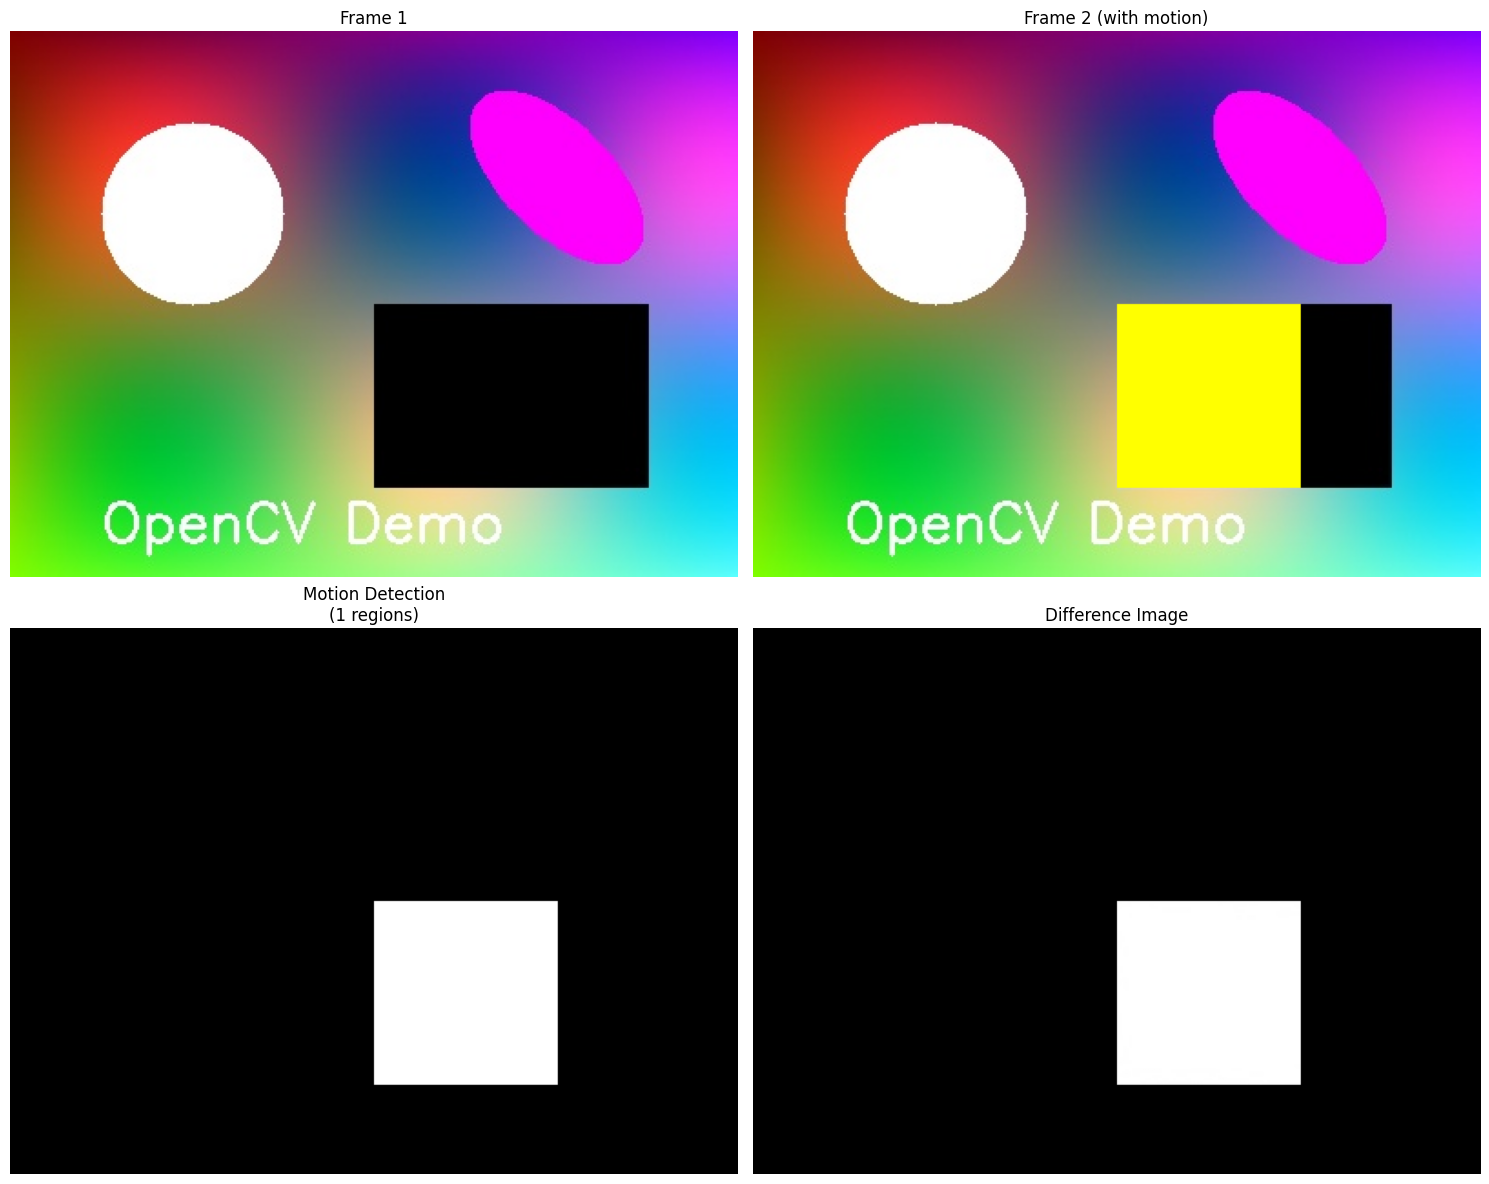


Motion regions detected:
  Region 1: (200, 150) - 101x101 (area: 10201 pixels)

Creating complex motion scenario...


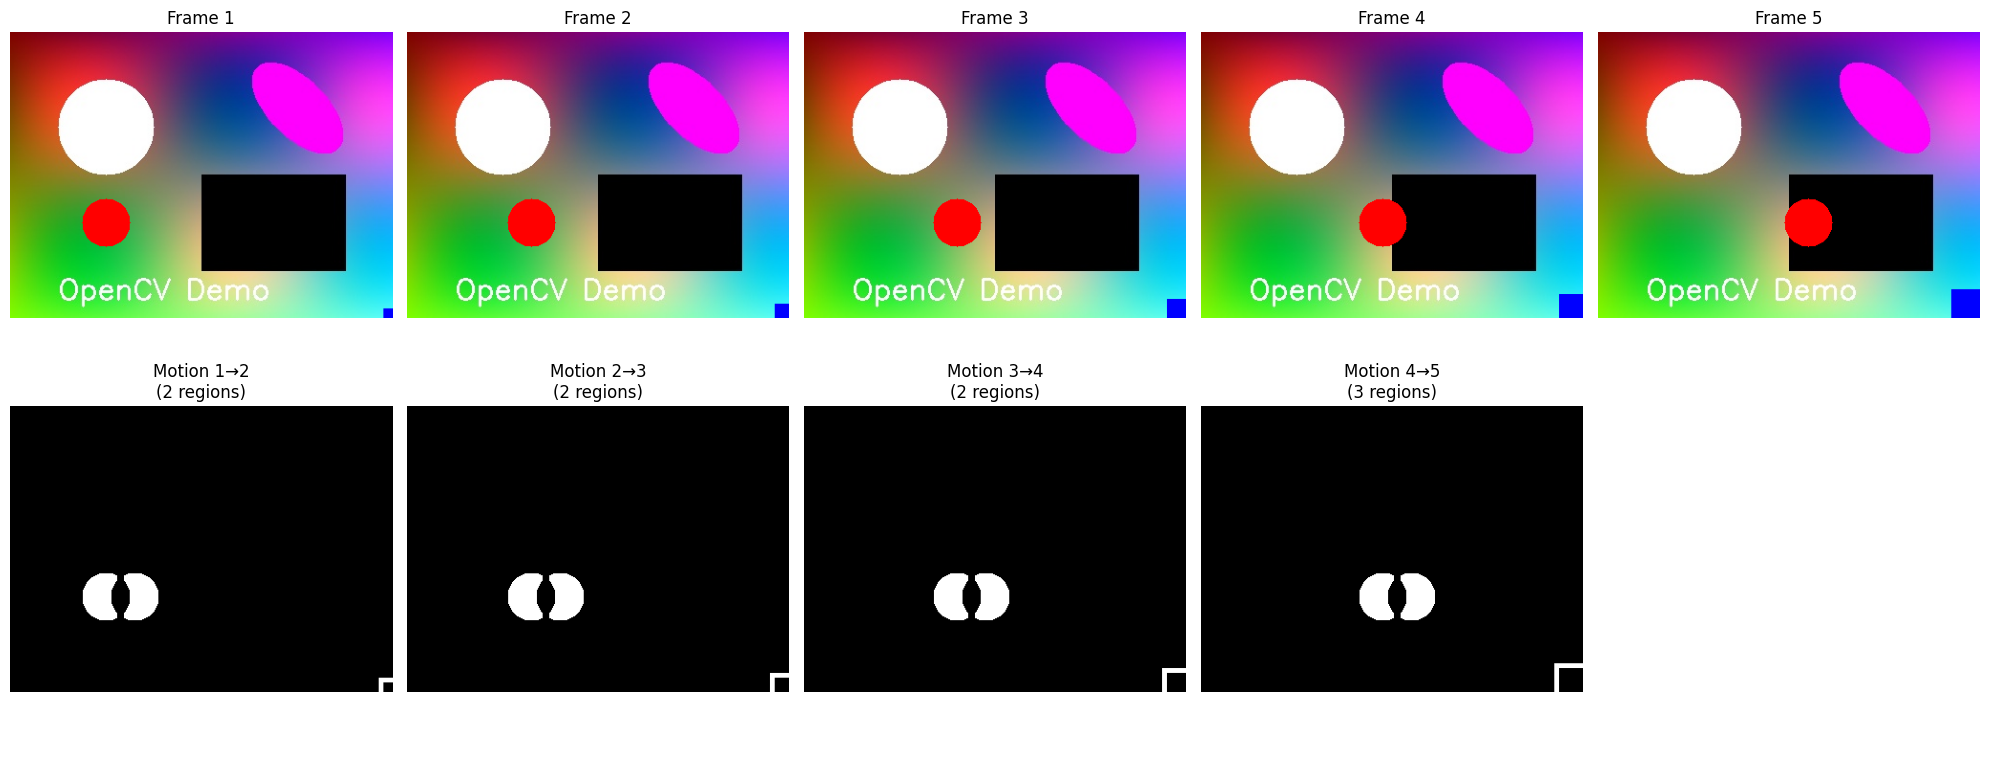


Motion analysis summary:
Frame 1→2: 2 regions, total area: 3528 pixels
Frame 2→3: 2 regions, total area: 3528 pixels
Frame 3→4: 2 regions, total area: 3528 pixels
Frame 4→5: 3 regions, total area: 4428 pixels


In [42]:
# Create two frames with motion for motion detection demo
frame1 = image.copy()

# Create frame2 with a moving object
frame2 = image.copy()

# Add a moving rectangle to simulate motion
cv2.rectangle(frame2, (200, 150), (300, 250), (0, 255, 255), -1)  # Yellow moving object

# Perform motion detection
motion_result, motion_regions = motion_detection(
    frame1, frame2, 
    threshold=25.0, 
    min_area=500
)

print(f"Motion detection found {len(motion_regions)} moving regions")

# Display motion detection results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Frame 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Frame 2 (with motion)')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(motion_result, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title(f'Motion Detection\n({len(motion_regions)} regions)')
axes[1, 0].axis('off')

# Show difference image
diff_image = cv2.absdiff(cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY), 
                        cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY))
axes[1, 1].imshow(diff_image, cmap='gray')
axes[1, 1].set_title('Difference Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print motion region details
if motion_regions:
    print("\nMotion regions detected:")
    for i, (x, y, w, h) in enumerate(motion_regions):
        area = w * h
        print(f"  Region {i+1}: ({x}, {y}) - {w}x{h} (area: {area} pixels)")

# Create a more complex motion scenario
print("\nCreating complex motion scenario...")

# Create multiple frames with different types of motion
frames = []
base_frame = image.copy()

# Generate sequence of frames with moving objects
for i in range(5):
    frame = base_frame.copy()
    
    # Moving circle
    center_x = 100 + i * 30
    cv2.circle(frame, (center_x, 200), 25, (0, 0, 255), -1)
    
    # Expanding rectangle
    size = 20 + i * 10
    cv2.rectangle(frame, (400 - size//2, 300 - size//2), 
                 (400 + size//2, 300 + size//2), (255, 0, 0), -1)
    
    frames.append(frame)

# Analyze motion between consecutive frames
motion_analysis = []
for i in range(len(frames) - 1):
    result, regions = motion_detection(
        frames[i], frames[i+1], 
        threshold=20.0, 
        min_area=200
    )
    motion_analysis.append((result, regions))

# Display frame sequence and motion
fig, axes = plt.subplots(2, len(frames), figsize=(20, 8))

for i, frame in enumerate(frames):
    axes[0, i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Frame {i+1}')
    axes[0, i].axis('off')

for i, (result, regions) in enumerate(motion_analysis):
    axes[1, i].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Motion {i+1}→{i+2}\n({len(regions)} regions)')
    axes[1, i].axis('off')

# Hide empty subplot
if len(motion_analysis) < len(frames):
    axes[1, -1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nMotion analysis summary:")
for i, (_, regions) in enumerate(motion_analysis):
    total_area = sum(w*h for x, y, w, h in regions)
    print(f"Frame {i+1}→{i+2}: {len(regions)} regions, total area: {total_area} pixels")

## 6. Optical Flow {#optical-flow}

Optical flow tracks the motion of pixels between frames, providing detailed motion vectors for each tracked point.

Performing Lucas-Kanade optical flow analysis...
Optical flow tracked 55 points


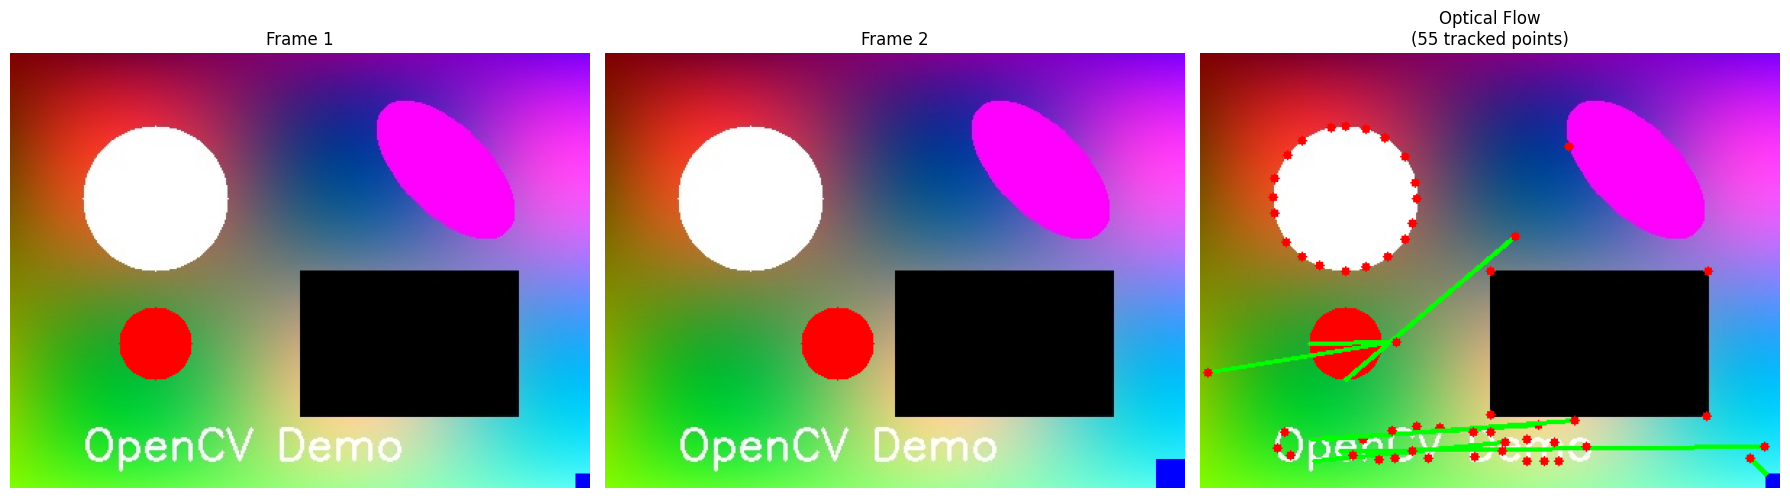


Optical Flow Analysis:
Average displacement: 130.52 pixels
Max displacement: 268.47 pixels
Min displacement: 18.79 pixels
Std displacement: 79.93 pixels

Performing dense optical flow (Farneback method)...


error: OpenCV(4.12.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/video/src/lkpyramid.cpp:1281: error: (-215:Assertion failed) (npoints = prevPtsMat.checkVector(2, CV_32F, true)) >= 0 in function 'calc'


In [ ]:
# Lucas-Kanade Optical Flow
print("Performing Lucas-Kanade optical flow analysis...")

# Use frames from motion detection example
image1 = frames[0]
image2 = frames[2]  # Skip a frame for more noticeable motion

# Perform optical flow
flow_result, flow_vectors = optical_flow_lucas_kanade(
    image1, image2,
    max_corners=100,
    quality_level=0.01,
    min_distance=10,
    block_size=3
)

print(f"Optical flow tracked {len(flow_vectors)} points")

# Display optical flow results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Frame 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Frame 2')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(flow_result, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'Optical Flow\n({len(flow_vectors)} tracked points)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Analyze flow vectors
if len(flow_vectors) > 0:
    # Calculate motion statistics
    displacements = []
    for i in range(0, len(flow_vectors), 2):
        if i + 1 < len(flow_vectors):
            dx = flow_vectors[i+1][0] - flow_vectors[i][0]
            dy = flow_vectors[i+1][1] - flow_vectors[i][1]
            displacement = np.sqrt(dx**2 + dy**2)
            displacements.append(displacement)
    
    if displacements:
        print(f"\nOptical Flow Analysis:")
        print(f"Average displacement: {np.mean(displacements):.2f} pixels")
        print(f"Max displacement: {np.max(displacements):.2f} pixels")
        print(f"Min displacement: {np.min(displacements):.2f} pixels")
        print(f"Std displacement: {np.std(displacements):.2f} pixels")

# Dense optical flow using Farneback method
print("\nPerforming dense optical flow (Farneback method)...")

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Calculate dense optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(
    gray1, gray2, None, 
    pyr_scale=0.5, levels=3, winsize=15, 
    iterations=3, poly_n=5, poly_sigma=1.2, flags=0
)

# Calculate flow magnitude and angle
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Create HSV visualization of optical flow
hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
hsv[..., 1] = 255  # Full saturation

# Set hue according to flow direction
hsv[..., 0] = angle * 180 / np.pi / 2

# Set value according to flow magnitude
hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Convert HSV to RGB for display
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# Visualize dense flow
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray1, cmap='gray')
plt.title('Frame 1 (Grayscale)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Frame 2 (Grayscale)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(flow_rgb)
plt.title('Dense Optical Flow\n(HSV Visualization)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(magnitude, cmap='hot')
plt.title('Flow Magnitude')
plt.colorbar()
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(angle, cmap='hsv')
plt.title('Flow Direction')
plt.colorbar()
plt.axis('off')

# Create a flow vector visualization
plt.subplot(2, 3, 6)
plt.imshow(gray1, cmap='gray')
step = 20
y, x = np.mgrid[step//2:flow.shape[0]:step, step//2:flow.shape[1]:step]
fx, fy = flow[y, x].T
plt.quiver(x, y, fx, fy, magnitude[y, x], scale_units='xy', scale=1, alpha=0.7)
plt.title('Flow Vectors')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Dense flow analysis:")
print(f"Max flow magnitude: {np.max(magnitude):.2f}")
print(f"Mean flow magnitude: {np.mean(magnitude):.2f}")
print(f"Flow field shape: {flow.shape}")
print(f"Motion coverage: {(magnitude > np.mean(magnitude)).sum() / magnitude.size * 100:.1f}%")

# Additional analysis
motion_threshold = np.mean(magnitude) + np.std(magnitude)
significant_motion = magnitude > motion_threshold
print(f"Significant motion areas: {significant_motion.sum() / magnitude.size * 100:.1f}%")
print(f"Motion threshold: {motion_threshold:.2f}")

## 7. Advanced Feature Detection {#advanced-features}

Building on basic feature detection, we'll explore advanced techniques for robust feature matching and analysis.

### 7.1 Multi-Scale Feature Detection

In [ ]:
# Multi-scale corner detection
print("Performing multi-scale corner detection...")

scales = [1.0, 0.75, 0.5, 0.25]
detectors = ['harris', 'shi_tomasi', 'fast']

# Demonstrate multi-scale detection
for detector in detectors:
    print(f"\n{detector.replace('_', '-').title()} detector at multiple scales:")
    
    fig, axes = plt.subplots(1, len(scales), figsize=(20, 5))
    
    for i, scale in enumerate(scales):
        # Resize image for different scales
        h, w = image.shape[:2]
        new_h, new_w = int(h * scale), int(w * scale)
        scaled_image = cv2.resize(image, (new_w, new_h))
        
        try:
            # Detect corners at this scale
            if detector == 'harris':
                corners, response = corner_detection.harris_corners(
                    scaled_image, block_size=2, ksize=3, k=0.04, threshold=0.01
                )
                # Convert corners format for visualization
                corner_points = np.array([[pt[0][0], pt[0][1]] for pt in corners]) if len(corners) > 0 else np.array([])
                
            elif detector == 'shi_tomasi':
                corner_points = corner_detection.shi_tomasi_corners(
                    scaled_image, max_corners=100, quality_level=0.01, min_distance=10
                )
                
            elif detector == 'fast':
                keypoints, _ = corner_detection.fast_corners(
                    scaled_image, threshold=10, non_max_suppression=True
                )
                corner_points = np.array([[kp.pt[0], kp.pt[1]] for kp in keypoints]) if len(keypoints) > 0 else np.array([])
            
            # Visualize results
            result_image = scaled_image.copy()
            if len(corner_points) > 0:
                for pt in corner_points:
                    cv2.circle(result_image, (int(pt[0]), int(pt[1])), 3, (0, 255, 0), -1)
            
            axes[i].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f'Scale {scale}x\n{len(corner_points)} corners')
            axes[i].axis('off')
            
            print(f"  Scale {scale}x: {len(corner_points)} corners detected")
            
        except Exception as e:
            print(f"  Scale {scale}x: Error - {e}")
            axes[i].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
            axes[i].set_title(f'Scale {scale}x\nError')
            axes[i].axis('off')
    
    plt.suptitle(f'{detector.replace("_", "-").title()} Corner Detection at Multiple Scales')
    plt.tight_layout()
    plt.show()

# Compare detector stability across scales
print(f"\nCorner Detection Stability Analysis:")
print("=" * 40)

stability_results = []
for detector in detectors:
    scale_counts = []
    
    for scale in scales:
        h, w = image.shape[:2]
        new_h, new_w = int(h * scale), int(w * scale)
        scaled_image = cv2.resize(image, (new_w, new_h))
        
        try:
            if detector == 'harris':
                corners, _ = corner_detection.harris_corners(scaled_image)
                count = len(corners)
            elif detector == 'shi_tomasi':
                corners = corner_detection.shi_tomasi_corners(scaled_image, max_corners=200)
                count = len(corners) if corners is not None else 0
            elif detector == 'fast':
                keypoints, _ = corner_detection.fast_corners(scaled_image)
                count = len(keypoints)
            
            scale_counts.append(count)
        except:
            scale_counts.append(0)
    
    # Calculate stability metrics
    if len(scale_counts) > 1:
        stability = 1.0 - (np.std(scale_counts) / (np.mean(scale_counts) + 1e-6))
        consistency = np.corrcoef(scales, scale_counts)[0, 1] if np.std(scale_counts) > 0 else 1.0
    else:
        stability = consistency = 0.0
    
    stability_results.append((detector, scale_counts, stability, consistency))
    
    print(f"{detector.replace('_', ' ').title():12}: {scale_counts}")
    print(f"             Stability: {stability:.3f}, Consistency: {consistency:.3f}")

# Plot stability comparison
plt.figure(figsize=(12, 8))
for detector, counts, stability, consistency in stability_results:
    plt.plot(scales, counts, 'o-', label=f'{detector.replace("_", " ").title()} (S:{stability:.2f})')

plt.xlabel('Scale Factor')
plt.ylabel('Number of Corners Detected')
plt.title('Corner Detection Stability Across Scales')
plt.legend()
plt.grid(True)
plt.show()

## 8. Practical Applications {#applications}

Let's combine multiple advanced techniques to solve real-world problems.

### 8.1 Document Scanner Application

In [ ]:
# Document Scanner: Combine edge detection, corner detection, and perspective transform
print("Creating Document Scanner Application...")

def create_document_image():
    """Create a synthetic document image for demonstration"""
    doc_image = np.ones((400, 300, 3), dtype=np.uint8) * 255  # White background
    
    # Add some text-like patterns
    for y in range(50, 350, 30):
        for x in range(20, 280, 40):
            if np.random.random() > 0.3:  # Random text blocks
                cv2.rectangle(doc_image, (x, y), (x + 30, y + 15), (0, 0, 0), -1)
    
    # Add document border
    cv2.rectangle(doc_image, (10, 10), (290, 390), (0, 0, 0), 2)
    
    return doc_image

def document_scanner_pipeline(image):
    """Complete document scanner pipeline"""
    results = {}
    
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    results['gray'] = gray
    
    # Step 2: Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    results['blurred'] = blurred
    
    # Step 3: Edge detection
    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
    results['edges'] = edges
    
    # Step 4: Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    results['contours'] = contours
    
    # Step 5: Find largest rectangular contour (document boundary)
    largest_contour = None
    max_area = 0
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > max_area and area > 1000:  # Minimum area threshold
            # Approximate contour to polygon
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            
            # Check if it's roughly rectangular (4 corners)
            if len(approx) == 4:
                largest_contour = approx
                max_area = area
    
    results['largest_contour'] = largest_contour
    
    # Step 6: Perspective correction (if document found)
    if largest_contour is not None:
        # Order the corners (top-left, top-right, bottom-right, bottom-left)
        corners = largest_contour.reshape(4, 2)
        
        # Sort corners
        rect = np.zeros((4, 2), dtype=np.float32)
        s = corners.sum(axis=1)
        rect[0] = corners[np.argmin(s)]  # Top-left
        rect[2] = corners[np.argmax(s)]  # Bottom-right
        
        diff = np.diff(corners, axis=1)
        rect[1] = corners[np.argmin(diff)]  # Top-right
        rect[3] = corners[np.argmax(diff)]  # Bottom-left
        
        # Define target rectangle
        width = max(np.linalg.norm(rect[0] - rect[1]), np.linalg.norm(rect[2] - rect[3]))
        height = max(np.linalg.norm(rect[0] - rect[3]), np.linalg.norm(rect[1] - rect[2]))
        
        dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32)
        
        # Get perspective transform matrix
        matrix = cv2.getPerspectiveTransform(rect, dst)
        
        # Apply perspective transform
        corrected = cv2.warpPerspective(image, matrix, (int(width), int(height)))
        results['corrected'] = corrected
        results['transform_matrix'] = matrix
    
    return results

# Create and process document
doc_image = create_document_image()

# Add perspective distortion to simulate photo of document
h, w = doc_image.shape[:2]
corners_src = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
corners_dst = np.float32([[20, 30], [w-10, 20], [w-30, h-10], [10, h-40]])
perspective_matrix = cv2.getPerspectiveTransform(corners_src, corners_dst)
distorted_doc = cv2.warpPerspective(doc_image, perspective_matrix, (w+50, h+50))

# Apply scanner pipeline
scanner_results = document_scanner_pipeline(distorted_doc)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original distorted document
axes[0, 0].imshow(cv2.cvtColor(distorted_doc, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Distorted Document')
axes[0, 0].axis('off')

# Grayscale
axes[0, 1].imshow(scanner_results['gray'], cmap='gray')
axes[0, 1].set_title('Grayscale')
axes[0, 1].axis('off')

# Edges
axes[0, 2].imshow(scanner_results['edges'], cmap='gray')
axes[0, 2].set_title('Edge Detection')
axes[0, 2].axis('off')

# Contours
contour_image = distorted_doc.copy()
cv2.drawContours(contour_image, scanner_results['contours'], -1, (0, 255, 0), 2)
if scanner_results['largest_contour'] is not None:
    cv2.drawContours(contour_image, [scanner_results['largest_contour']], -1, (0, 0, 255), 3)

axes[1, 0].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Contours (Red = Document)')
axes[1, 0].axis('off')

# Original document
axes[1, 1].imshow(cv2.cvtColor(doc_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Original Document')
axes[1, 1].axis('off')

# Corrected document
if 'corrected' in scanner_results:
    axes[1, 2].imshow(cv2.cvtColor(scanner_results['corrected'], cv2.COLOR_BGR2RGB))
    axes[1, 2].set_title('Corrected Document')
else:
    axes[1, 2].text(0.5, 0.5, 'Document not found', ha='center', va='center', 
                   transform=axes[1, 2].transAxes, fontsize=12)
    axes[1, 2].set_title('Correction Failed')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Document Scanner Pipeline Results:")
print("=" * 35)
print(f"Contours found: {len(scanner_results['contours'])}")
print(f"Document detected: {'Yes' if scanner_results['largest_contour'] is not None else 'No'}")
if 'corrected' in scanner_results:
    original_size = f"{doc_image.shape[1]}x{doc_image.shape[0]}"
    corrected_size = f"{scanner_results['corrected'].shape[1]}x{scanner_results['corrected'].shape[0]}"
    print(f"Original size: {original_size}")
    print(f"Corrected size: {corrected_size}")

## 9. Exercises {#exercises}

Practice these advanced techniques with the following exercises:

### Exercise 1: Custom Template Matching
Create a function that combines multi-scale and rotation-invariant template matching for robust object detection.

### Exercise 2: Adaptive Segmentation
Implement an adaptive segmentation algorithm that automatically selects the best method based on image characteristics.

### Exercise 3: Motion Analysis
Build a complete motion analysis system that tracks objects across multiple frames and analyzes their trajectories.

### Exercise 4: Feature-based Image Registration
Use advanced feature detection to register (align) two images of the same scene taken from different viewpoints.

### Exercise 5: Real-time Processing
Optimize one of the techniques for real-time video processing, considering computational efficiency.

In [ ]:
# Exercise Solution Templates
# Uncomment and complete the following functions:

def robust_template_matching(image, template, scale_range=(0.5, 1.5), angle_range=(0, 360, 15)):
    """
    Exercise 1: Combine multi-scale and rotation-invariant template matching
    
    Args:
        image: Input image
        template: Template to match
        scale_range: Range of scales to test (min, max)
        angle_range: Range of angles to test (start, stop, step)
    
    Returns:
        List of (location, correlation, scale, angle) tuples
    """
    # TODO: Implement combined multi-scale and rotation-invariant matching
    pass

def adaptive_segmentation(image, methods=['otsu', 'kmeans', 'watershed']):
    """
    Exercise 2: Automatically select best segmentation method
    
    Args:
        image: Input image
        methods: List of segmentation methods to try
    
    Returns:
        Best segmentation result and method used
    """
    # TODO: Implement adaptive segmentation with quality metrics
    pass

def motion_tracker(frame_sequence, object_roi):
    """
    Exercise 3: Track object motion across frames
    
    Args:
        frame_sequence: List of frames
        object_roi: Initial region of interest (x, y, w, h)
    
    Returns:
        Trajectory data and motion analysis
    """
    # TODO: Implement object tracking and trajectory analysis
    pass

def feature_image_registration(image1, image2, method='orb'):
    """
    Exercise 4: Register two images using feature matching
    
    Args:
        image1: Reference image
        image2: Image to be registered
        method: Feature detection method ('orb', 'sift', 'surf')
    
    Returns:
        Registered image and transformation matrix
    """
    # TODO: Implement feature-based image registration
    pass

def real_time_processor(video_path, technique='edge_detection'):
    """
    Exercise 5: Process video in real-time
    
    Args:
        video_path: Path to video file
        technique: Processing technique to apply
    
    Returns:
        Processed video and performance metrics
    """
    # TODO: Implement real-time video processing with optimization
    pass

print("Exercise templates ready!")
print("Uncomment and complete the functions above to practice advanced techniques.")
print("\nTips for exercises:")
print("1. Start with simple test cases")
print("2. Add error handling and input validation")
print("3. Test with different image types and sizes")
print("4. Optimize for performance when needed")
print("5. Document your approach and results")

## Summary

In this notebook, we explored advanced OpenCV techniques including:

### 🔍 **Template Matching**
- Basic template matching with correlation methods
- Multi-scale matching for size-invariant detection
- Rotation-invariant matching for orientation-robust detection
- Non-maximum suppression for cleaner results

### 🎯 **Image Segmentation**  
- Threshold-based segmentation (Otsu, Triangle, Adaptive)
- Watershed segmentation for separating connected objects
- K-means clustering for color-based segmentation
- Segmentation quality evaluation

### 📊 **Fourier Analysis**
- Fourier transform for frequency domain analysis
- Frequency domain filtering (lowpass, highpass)
- Butterworth and Gaussian filters
- Image reconstruction and restoration

### 🤖 **Machine Learning Applications**
- HOG (Histogram of Oriented Gradients) object detection
- Motion detection for surveillance applications
- Optical flow for motion vector analysis
- Background subtraction techniques

### 🏃 **Motion Analysis**
- Lucas-Kanade optical flow for sparse motion tracking
- Dense optical flow for complete motion fields
- Multi-frame motion analysis and trajectory tracking

### 🔧 **Advanced Feature Detection**
- Multi-scale corner detection for robustness
- Feature stability analysis across scales
- Performance comparison of different detectors

### 💼 **Practical Applications**
- Document scanner with perspective correction
- Real-world problem solving with combined techniques
- Performance optimization considerations

### 🎓 **Key Takeaways**
1. **Combine techniques** for robust solutions
2. **Consider scale and rotation** for real-world applications
3. **Evaluate performance** with appropriate metrics
4. **Optimize for speed** when needed for real-time applications
5. **Validate results** on diverse test cases

### 📚 **Next Steps**
- Practice with the provided exercises
- Explore the `08_practical_applications.ipynb` notebook
- Experiment with different parameter settings
- Apply these techniques to your own projects
- Consider GPU acceleration for computationally intensive tasks

---

**Congratulations!** You've mastered advanced OpenCV techniques. These skills form the foundation for computer vision applications, robotics, surveillance systems, and advanced image analysis projects.